In [2]:
import numpy as np
import scipy as s
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import scipy.io as sio
import os
from typing import List, Dict
import pandas as pd
import sys
sys.path.append('../')
import model as m
%matplotlib inline

In [2]:
d = s.io.loadmat?

Object `s.io.loadmat` not found.


In [91]:
d = sio.loadmat("./data/simulation_data.mat")

In [94]:
d['data'].shape

(210, 1)

In [106]:
def modelMat2Dict(mat) -> dict:
    ret = []
    d = mat['data']
    for i in range(d.shape[0]):
        ret.append({'time': d[i][0][0].reshape(-1),
                    'ox_pos': np.around(d[i][0][1].reshape(-1), 3),
                    'ox_speed': np.around(d[i][0][2].reshape(-1), 3),
                    'duty_cycle': np.around(d[i][0][3].reshape(-1),3),
                    'begin_pos': d[i][0][4][0, 0],
                    'end_pos': d[i][0][5][0, 0]})
    return ret

In [55]:
d['data'][0][0][5]

array([[-0.6]])

In [38]:
def allMatModelLoad(path: str) -> List[Dict]:
    ret = []
    for root, dirs, files in os.walk(path):
        for file in files:
            data = sio.loadmat(os.path.join(root, file))
            ret.append(modelMat2Dict(data))
    return ret

In [169]:


def convert2LongRepresent(value: List[Dict]) -> Dict:
    ret = {}
    for el in value:
        for key in el:
            v = ret.get(key, [])
            v.append(el[key])
            ret[key] = v
    
    for key in ret:
        ret[key] = np.stack(ret[key]).reshape(-1)
    return ret

def findEndControll(v):
    index = 0;
    for el in v['duty_cycle'][::-1]:
        if el != 0:
            break
        else:
            index = index + 1
    return len(v['duty_cycle']) - index

def cutData(data: List[Dict]) -> List[Dict]:
    for el in data:
        last_index = findEndControll(el)
        print(last_index)
        for key in el:
            if type(el[key]) == np.array:
                el[key] = el[key][0:last_index]
        

In [170]:
cutData(v)
v

61
67
72
77
82
86
89
92
93
94
94
91
106
117
77
63
69
74
79
83
86
88
90
91
91
89
105
115
82
61
64
70
76
81
84
86
88
89
89
87
104
113
90
65
63
65
72
76
80
84
85
87
86
85
100
110
94
83
68
64
65
72
77
81
82
84
83
83
99
109
97
86
71
70
65
65
73
77
79
81
81
81
95
106
100
89
74
73
71
66
68
73
76
79
79
79
94
104
102
92
76
76
75
72
66
66
72
75
76
76
92
102
104
94
79
79
79
76
73
68
66
71
73
74
89
100
106
95
81
81
81
79
77
73
65
65
70
71
86
97
109
99
83
83
84
82
81
77
72
65
64
68
83
94
110
100
85
86
87
85
84
80
76
72
65
63
65
90
113
104
87
89
89
88
86
84
81
76
70
64
61
82
115
105
89
91
91
90
88
86
83
79
74
69
63
77
117
106
91
94
94
93
92
89
86
82
77
72
67
61


[{'time': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
         0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
         0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
         0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
         0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
         0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ]),
  'ox_pos': array([-0.7  , -0.699, -0.696, -0.692, -0.689, -0.684, -0.68 , -0.675,
         -0.671, -0.666, -0.662, -0.657, -0.653, -0.649, -0.645, -0.641,
         -0.637, -0.634, -0.631, -0.628, -0.625, -0.623, -0.62 , -0.618,
         -0.616, -0.614, -0.613, -0.611, -0.61 , -0.609, -0.608, -0.607,
         -0.606, -0.605, -0.604, -0.603, -0.603, -0.602, -0.602, -0.602,
         -0.601, -0.601, -0.601, -0.601, -0.6  , -0.6  , -0.6  , -0.6  ,
         -0.6  , -0.6  , -0.6  , -0.6  , -0.6  , -0.6  , -0.6  , -0.6  ,
         -0.6  , -0.6  , -0.6  , -0.6  , -0.6  ])

In [157]:

print(index)

60

In [153]:
v[0]['duty_cycle'][index]

0.001

In [120]:
long = convert2LongRepresent(v)

In [122]:
df = pd.DataFrame(long)

ValueError: arrays must all be same length

In [123]:
long

{'time': array([0.  , 0.01, 0.02, ..., 2.98, 2.99, 3.  ]),
 'ox_pos': array([-0.7  , -0.699, -0.696, ...,  0.6  ,  0.6  ,  0.6  ]),
 'ox_speed': array([ 0.   ,  0.217,  0.309, ..., -0.   , -0.   ,  0.   ]),
 'duty_cycle': array([-1.  , -0.39, -0.24, ..., -0.  , -0.  , -0.  ]),
 'begin_pos': array([-0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7, -0.7,
        -0.7, -0.7, -0.7, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.6,
        -0.6, -0.6, -0.6, -0.6, -0.6, -0.6, -0.5, -0.5, -0.5, -0.5, -0.5,
        -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.5, -0.4, -0.4,
        -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4, -0.4,
        -0.4, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3, -0.3,
        -0.3, -0.3, -0.3, -0.3, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2,
        -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.1, -0.1, -0.1, -0.1,
        -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,

# Формирование обучающей выборки

In [136]:
dsize = long["time"].shape[0]
x = []
y = []
for i in range(dsize-1):
    x.append([long['ox_pos'][i], long['ox_speed'][i], long['duty_cycle'][i]])
    y.append([long['ox_pos'][i+1], long['ox_speed'][i+1]])
x = np.stack(x)
y = np.stack(y)

In [140]:
for el in y:
    print(el)

[-0.699  0.217]
[-0.696  0.309]
[-0.692  0.362]
[-0.689  0.401]
[-0.684  0.429]
[-0.68   0.447]
[-0.675  0.457]
[-0.671  0.461]
[-0.666  0.459]
[-0.662  0.452]
[-0.657  0.441]
[-0.653  0.428]
[-0.649  0.412]
[-0.645  0.394]
[-0.641  0.375]
[-0.637  0.355]
[-0.634  0.334]
[-0.631  0.313]
[-0.628  0.293]
[-0.625  0.272]
[-0.623  0.252]
[-0.62   0.233]
[-0.618  0.215]
[-0.616  0.197]
[-0.614  0.18 ]
[-0.613  0.164]
[-0.611  0.149]
[-0.61   0.136]
[-0.609  0.123]
[-0.608  0.11 ]
[-0.607  0.099]
[-0.606  0.089]
[-0.605  0.079]
[-0.604  0.071]
[-0.603  0.063]
[-0.603  0.055]
[-0.602  0.049]
[-0.602  0.043]
[-0.602  0.038]
[-0.601  0.033]
[-0.601  0.028]
[-0.601  0.025]
[-0.601  0.021]
[-0.6    0.018]
[-0.6    0.015]
[-0.6    0.013]
[-0.6    0.011]
[-0.6    0.009]
[-0.6    0.007]
[-0.6    0.006]
[-0.6    0.005]
[-0.6    0.003]
[-0.6    0.002]
[-0.6    0.002]
[-0.6    0.001]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6   -0.001]
[-0.6   -0.001]
[-0.6   -0.001]
[-0.6   -0.001]
[-0.6   -0.001]
[-0.

[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199 -0.   ]
[-0.199  0.   ]
[-0.199  0.   ]
[-0.199 -0.   ]
[-0.199 

[ 0.202 -0.   ]
[ 0.202 -0.   ]
[0.202 0.   ]
[0.202 0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[0.202 0.   ]
[0.202 0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[0.202 0.   ]
[0.202 0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[0.202 0.   ]
[0.202 0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[0.202 0.   ]
[0.202 0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[0.202 0.   ]
[0.202 0.   ]
[ 0.202 -0.   ]
[ 0.202 -0.   ]
[0.202 0.   ]
[0.202 0.   ]
[-0.7  0. ]
[-0.699  0.217]
[-0.696  0.44 ]
[-0.69   0.663]
[-0.682  0.887]
[-0.672  1.112]
[-0.66   1.339]
[-0.646  1.568]
[-0.629  1.799]
[-0.61   2.033]
[-0.588  2.27 ]
[-0.564  2.51 ]
[-0.538  2.754]
[-0.509  3.002]
[-0.478  3.253]
[-0.444  3.508]
[-0.408  3.768]
[-0.369  3.947]
[-0.329  4.023]
[-0.288  4.022]
[-0.249  3.965]
[-0.21   3.865]
[-0.172  3.731]
[-0.136  3.57 ]
[-0.102  3.391]
[-0.069  3.2  ]
[-0.038  3.003]
[-0.009  2.806]
[0.017 2.612]
[0.042 2.423]
[0.065 2.242

[0.701 0.111]
[0.702 0.094]
[0.703 0.079]
[0.704 0.066]
[0.704 0.054]
[0.705 0.043]
[0.705 0.034]
[0.705 0.026]
[0.706 0.019]
[0.706 0.013]
[0.706 0.008]
[0.706 0.004]
[ 0.706 -0.   ]
[ 0.706 -0.003]
[ 0.706 -0.006]
[ 0.706 -0.008]
[ 0.706 -0.009]
[ 0.705 -0.011]
[ 0.705 -0.012]
[ 0.705 -0.012]
[ 0.705 -0.013]
[ 0.705 -0.013]
[ 0.705 -0.013]
[ 0.705 -0.013]
[ 0.705 -0.013]
[ 0.704 -0.012]
[ 0.704 -0.012]
[ 0.704 -0.011]
[ 0.704 -0.011]
[ 0.704 -0.01 ]
[ 0.704 -0.01 ]
[ 0.704 -0.009]
[ 0.704 -0.009]
[ 0.704 -0.008]
[ 0.704 -0.007]
[ 0.704 -0.007]
[ 0.703 -0.006]
[ 0.703 -0.006]
[ 0.703 -0.005]
[ 0.703 -0.005]
[ 0.703 -0.004]
[ 0.703 -0.004]
[ 0.703 -0.004]
[ 0.703 -0.003]
[ 0.703 -0.003]
[ 0.703 -0.003]
[ 0.703 -0.002]
[ 0.703 -0.002]
[ 0.703 -0.002]
[ 0.703 -0.002]
[ 0.703 -0.001]
[ 0.703 -0.001]
[ 0.703 -0.001]
[ 0.703 -0.001]
[ 0.703 -0.001]
[ 0.703 -0.001]
[ 0.703 -0.001]
[ 0.703 -0.001]
[ 0.703 -0.   ]
[ 0.703 -0.   ]
[ 0.703 -0.   ]
[ 0.703 -0.   ]
[ 0.703 -0.   ]
[ 0.703 -0.   ]


[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.6  0. ]
[-0.599  0.235]
[-0.595  0.475]
[-0.589  0.715]
[-0.

[0.2   0.022]
[0.2   0.019]
[0.2   0.017]
[0.2   0.015]
[0.2   0.013]
[0.201 0.012]
[0.201 0.01 ]
[0.201 0.009]
[0.201 0.008]
[0.201 0.007]
[0.201 0.006]
[0.201 0.005]
[0.201 0.005]
[0.201 0.004]
[0.201 0.003]
[0.201 0.003]
[0.201 0.003]
[0.201 0.002]
[0.201 0.002]
[0.201 0.002]
[0.201 0.002]
[0.201 0.001]
[0.201 0.001]
[0.201 0.001]
[0.201 0.001]
[0.201 0.001]
[0.201 0.001]
[0.201 0.001]
[0.201 0.001]
[0.201 0.001]
[0.201 0.001]
[0.201 0.   ]
[0.201 0.   ]
[0.201 0.   ]
[0.201 0.   ]
[0.201 0.   ]
[0.201 0.   ]
[0.201 0.   ]
[0.201 0.   ]
[0.201 0.   ]
[ 0.201 -0.   ]
[ 0.201 -0.   ]
[0.201 0.   ]
[0.201 0.   ]
[ 0.201 -0.   ]
[ 0.201 -0.   ]
[0.201 0.   ]
[0.201 0.   ]
[ 0.201 -0.   ]
[ 0.201 -0.   ]
[0.201 0.   ]
[0.201 0.   ]
[ 0.201 -0.   ]
[ 0.201 -0.   ]
[0.201 0.   ]
[0.201 0.   ]
[ 0.201 -0.   ]
[ 0.201 -0.   ]
[0.201 0.   ]
[0.201 0.   ]
[ 0.201 -0.   ]
[ 0.201 -0.   ]
[0.201 0.   ]
[0.201 0.   ]
[ 0.201 -0.   ]
[ 0.201 -0.   ]
[0.201 0.   ]
[0.201 0.   ]
[ 0.201 -0.   ]
[ 0.

[ 0.602 -0.001]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[0.602 0.   ]
[0.602 0.   ]
[ 0.602 -0.   ]
[ 0.602 -0.   ]
[ 0.

[-0.4    0.001]
[-0.4    0.001]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4  0. ]
[-0.4 -0. ]
[-0.4 -0. ]
[-0.4  0

[-0.099  0.   ]
[-0.5  0. ]
[-0.499  0.249]
[-0.495  0.505]
[-0.489  0.76 ]
[-0.48   1.016]
[-0.468  1.273]
[-0.454  1.532]
[-0.438  1.792]
[-0.419  2.019]
[-0.397  2.166]
[-0.375  2.247]
[-0.352  2.278]
[-0.329  2.271]
[-0.307  2.235]
[-0.285  2.176]
[-0.264  2.1  ]
[-0.244  2.01 ]
[-0.225  1.91 ]
[-0.206  1.805]
[-0.189  1.697]
[-0.173  1.587]
[-0.158  1.479]
[-0.144  1.374]
[-0.131  1.272]
[-0.119  1.174]
[-0.108  1.081]
[-0.098  0.994]
[-0.089  0.912]
[-0.08   0.835]
[-0.073  0.763]
[-0.066  0.697]
[-0.059  0.635]
[-0.053  0.578]
[-0.048  0.526]
[-0.043  0.478]
[-0.039  0.434]
[-0.035  0.393]
[-0.031  0.356]
[-0.028  0.322]
[-0.025  0.291]
[-0.022  0.263]
[-0.02   0.237]
[-0.018  0.214]
[-0.016  0.193]
[-0.014  0.173]
[-0.012  0.156]
[-0.011  0.14 ]
[-0.01   0.126]
[-0.009  0.113]
[-0.008  0.101]
[-0.007  0.091]
[-0.006  0.081]
[-0.005  0.073]
[-0.005  0.065]
[-0.004  0.058]
[-0.003  0.052]
[-0.003  0.046]
[-0.003  0.041]
[-0.002  0.037]
[-0.002  0.033]
[-0.002  0.029]
[-0.001  0.0

[0.301 0.   ]
[0.301 0.   ]
[ 0.301 -0.   ]
[ 0.301 -0.   ]
[0.301 0.   ]
[0.301 0.   ]
[ 0.301 -0.   ]
[ 0.301 -0.   ]
[ 0.301 -0.   ]
[ 0.301 -0.   ]
[-0.5  0. ]
[-0.499  0.249]
[-0.495  0.505]
[-0.489  0.76 ]
[-0.48   1.016]
[-0.468  1.273]
[-0.454  1.532]
[-0.438  1.792]
[-0.418  2.053]
[-0.397  2.317]
[-0.372  2.583]
[-0.345  2.851]
[-0.315  3.122]
[-0.283  3.395]
[-0.247  3.628]
[-0.21   3.753]
[-0.172  3.788]
[-0.135  3.757]
[-0.098  3.681]
[-0.062  3.569]
[-0.027  3.428]
[0.006 3.268]
[0.038 3.094]
[0.067 2.913]
[0.095 2.73 ]
[0.121 2.548]
[0.146 2.371]
[0.168 2.199]
[0.189 2.035]
[0.208 1.879]
[0.226 1.731]
[0.242 1.593]
[0.257 1.463]
[0.271 1.342]
[0.284 1.229]
[0.295 1.124]
[0.305 1.027]
[0.315 0.937]
[0.324 0.854]
[0.332 0.777]
[0.339 0.707]
[0.345 0.642]
[0.351 0.582]
[0.357 0.527]
[0.361 0.477]
[0.366 0.431]
[0.37  0.389]
[0.373 0.35 ]
[0.376 0.315]
[0.379 0.283]
[0.382 0.254]
[0.384 0.228]
[0.386 0.204]
[0.388 0.182]
[0.39  0.163]
[0.391 0.145]
[0.392 0.129]
[0.394 0.115

[0.702 0.   ]
[0.702 0.   ]
[ 0.702 -0.   ]
[ 0.702 -0.   ]
[ 0.702 -0.   ]
[ 0.702 -0.   ]
[0.702 0.   ]
[0.702 0.   ]
[ 0.702 -0.   ]
[ 0.702 -0.   ]
[0.702 0.   ]
[0.702 0.   ]
[ 0.702 -0.   ]
[ 0.702 -0.   ]
[0.702 0.   ]
[0.702 0.   ]
[ 0.702 -0.   ]
[ 0.702 -0.   ]
[0.702 0.   ]
[0.702 0.   ]
[ 0.702 -0.   ]
[ 0.702 -0.   ]
[-0.4  0. ]
[-0.401 -0.262]
[-0.405 -0.529]
[-0.412 -0.795]
[-0.421 -1.033]
[-0.433 -1.2  ]
[-0.445 -1.309]
[-0.459 -1.375]
[-0.473 -1.407]
[-0.487 -1.414]
[-0.501 -1.403]
[-0.515 -1.376]
[-0.528 -1.338]
[-0.541 -1.291]
[-0.554 -1.237]
[-0.566 -1.179]
[-0.577 -1.118]
[-0.588 -1.056]
[-0.598 -0.993]
[-0.607 -0.93 ]
[-0.616 -0.868]
[-0.624 -0.808]
[-0.632 -0.749]
[-0.639 -0.693]
[-0.645 -0.639]
[-0.651 -0.588]
[-0.657 -0.539]
[-0.662 -0.493]
[-0.666 -0.45 ]
[-0.67  -0.409]
[-0.674 -0.372]
[-0.677 -0.336]
[-0.68  -0.303]
[-0.683 -0.273]
[-0.686 -0.245]
[-0.688 -0.219]
[-0.69  -0.195]
[-0.692 -0.173]
[-0.693 -0.153]
[-0.695 -0.135]
[-0.696 -0.119]
[-0.697 -0.104]


[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.

[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[0.101 0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[ 0.101 -0.   ]
[0.101 0.   ]
[-0.4  0. ]
[-0.399  0.262]
[-0.395  0.53 ]
[-0.388  0.797]
[-0.379  1.066]
[-0.367  1.335]
[-0.352  1.605]
[-0.

[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]
[ 0.502 -0.   ]
[0.502 0.   ]
[0.502 0.   ]
[ 0.502 -0.   ]


[-0.6 -0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.6 -0. ]
[-0.6 -0. ]
[-0.6  0. ]
[-0.6  0. ]
[-0.3  0. ]
[-0.301 -0.271]
[-0.305 -0.511]
[-0.312 -0.682]
[-0.319 -0.8  ]
[-0.328 -0.878]
[-0.337 -0.925]
[-0.347 -0.948]
[-0.356 -0.954]
[-0.366 -0.946]
[-0.375 -0.927]
[-0.384 -0.9  ]
[-0.393 -0.867]
[-0.401 -0.83 ]
[-0.409 -0.789]
[-0.417 -0.747]
[-0.424 -0.703]
[-0.43  -0.659]
[-0.436 -0.616]
[-0.442 -0.574]


[-0.     0.011]
[-0.     0.009]
[-0.     0.008]
[-0.     0.007]
[-0.     0.006]
[-0.     0.006]
[-0.     0.005]
[0.    0.005]
[0.    0.004]
[0.    0.004]
[0.    0.003]
[0.    0.003]
[0.    0.002]
[0.    0.002]
[0.    0.002]
[0.    0.002]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0.    0.001]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[ 0. -0.]
[ 0. -0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[ 0. -0.]
[ 0. -0.]
[0. 0.]
[0. 0.]
[ 0. -0.]
[ 0. -0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[ 0. -0.]
[ 0. -0.]
[0. 0.]
[0. 0.]
[ 0. -0.]
[ 0. -0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[ 0. -0.]
[ 0. -0.]
[0. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[ 0. -0.]
[ 0. -0.]
[0. 0.]
[0. 

[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0.   ]
[ 0.401 -0.   ]
[ 0.401 -0.   ]
[0.401 0.   ]
[0.401 0. 

[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.2  0. ]
[-0.201 -0.278]
[-0.206 -0.563]
[-0.213 -0.846]
[-0.222 -1.129]
[-0.235 -1.4

[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3  0. ]
[-0.3  0. ]
[-0.2  0. ]
[-0.199  0.279]
[-0.195  0.389]
[-0.191  0.439]
[-0.186  0.47 ]
[-0.181  0.487]
[-0.176  0.493]
[-0.171  0.491]
[-0.166  0.483]
[-0.162  0.47 ]
[-0.157  0.453]
[-0.153  0.434]
[-0.149  0.413]
[-0.

[0.25  0.553]
[0.255 0.503]
[0.26  0.457]
[0.264 0.415]
[0.268 0.376]
[0.271 0.34 ]
[0.274 0.308]
[0.277 0.278]
[0.28 0.25]
[0.282 0.226]
[0.284 0.203]
[0.286 0.183]
[0.288 0.164]
[0.289 0.147]
[0.29  0.132]
[0.292 0.118]
[0.293 0.105]
[0.294 0.094]
[0.294 0.084]
[0.295 0.075]
[0.296 0.067]
[0.296 0.059]
[0.297 0.053]
[0.297 0.047]
[0.298 0.041]
[0.298 0.036]
[0.298 0.032]
[0.299 0.029]
[0.299 0.025]
[0.299 0.022]
[0.299 0.019]
[0.3   0.017]
[0.3   0.015]
[0.3   0.013]
[0.3   0.011]
[0.3  0.01]
[0.3   0.009]
[0.3   0.008]
[0.3   0.007]
[0.3   0.006]
[0.3   0.005]
[0.3   0.004]
[0.301 0.004]
[0.301 0.003]
[0.301 0.003]
[0.301 0.002]
[0.301 0.002]
[0.301 0.002]
[0.301 0.001]
[0.301 0.001]
[0.301 0.001]
[0.301 0.001]
[0.301 0.001]
[0.301 0.001]
[0.301 0.001]
[0.301 0.001]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[ 0.301 -0.   ]
[ 0.301 -0.   ]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[0.301 0.   ]
[ 0.30

[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0

[-0.279 -0.235]
[-0.281 -0.214]
[-0.283 -0.194]
[-0.285 -0.175]
[-0.287 -0.159]
[-0.288 -0.143]
[-0.289 -0.129]
[-0.291 -0.117]
[-0.292 -0.105]
[-0.293 -0.094]
[-0.293 -0.085]
[-0.294 -0.076]
[-0.295 -0.068]
[-0.296 -0.061]
[-0.296 -0.054]
[-0.297 -0.048]
[-0.297 -0.043]
[-0.297 -0.038]
[-0.298 -0.034]
[-0.298 -0.03 ]
[-0.298 -0.027]
[-0.299 -0.024]
[-0.299 -0.021]
[-0.299 -0.019]
[-0.299 -0.016]
[-0.299 -0.014]
[-0.299 -0.013]
[-0.299 -0.011]
[-0.3  -0.01]
[-0.3   -0.009]
[-0.3   -0.007]
[-0.3   -0.006]
[-0.3   -0.006]
[-0.3   -0.005]
[-0.3   -0.004]
[-0.3   -0.004]
[-0.3   -0.003]
[-0.3   -0.003]
[-0.3   -0.002]
[-0.3   -0.002]
[-0.3   -0.002]
[-0.3   -0.002]
[-0.3   -0.001]
[-0.3   -0.001]
[-0.3   -0.001]
[-0.3   -0.001]
[-0.3   -0.001]
[-0.3   -0.001]
[-0.3   -0.001]
[-0.3   -0.001]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. ]
[-0.3 -0. 

[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[0.2 0. ]
[ 0.2 -0. ]
[ 0.2 -0. ]
[0.2 0. ]


[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   ]
[0.601 0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[ 0.601 -0.   ]
[0.601 0.   

[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501  0.   ]
[-0.501 -0.   ]
[-0.501 -0.   ]
[-0.501  0.   ]
[-0.501 

[-0.1  0. ]
[-0.1  0. ]
[-0.1 -0. ]
[-0.1 -0. ]
[-0.1  0. ]
[-0.1  0. ]
[-0.1 -0. ]
[0. 0.]
[0.001 0.284]
[0.005 0.396]
[0.01  0.446]
[0.014 0.475]
[0.019 0.491]
[0.024 0.496]
[0.029 0.493]
[0.034 0.484]
[0.039 0.47 ]
[0.043 0.453]
[0.048 0.433]
[0.052 0.411]
[0.056 0.389]
[0.059 0.365]
[0.063 0.342]
[0.066 0.319]
[0.069 0.297]
[0.072 0.275]
[0.074 0.255]
[0.077 0.235]
[0.079 0.216]
[0.081 0.199]
[0.083 0.182]
[0.084 0.167]
[0.086 0.152]
[0.087 0.139]
[0.088 0.127]
[0.09  0.115]
[0.091 0.105]
[0.092 0.095]
[0.092 0.086]
[0.093 0.078]
[0.094 0.07 ]
[0.095 0.064]
[0.095 0.057]
[0.096 0.052]
[0.096 0.047]
[0.097 0.042]
[0.097 0.038]
[0.097 0.034]
[0.098 0.03 ]
[0.098 0.027]
[0.098 0.024]
[0.098 0.022]
[0.099 0.02 ]
[0.099 0.018]
[0.099 0.016]
[0.099 0.014]
[0.099 0.012]
[0.099 0.011]
[0.099 0.01 ]
[0.099 0.009]
[0.099 0.008]
[0.1   0.007]
[0.1   0.006]
[0.1   0.006]
[0.1   0.005]
[0.1   0.004]
[0.1   0.004]
[0.1   0.003]
[0.1   0.003]
[0.1   0.003]
[0.1   0.002]
[0.1   0.002]
[0.1   0.002

[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0.   ]
[0.501 0.   ]
[ 0.501 -0.   ]
[ 0.501 -0.   ]
[0.501 0

[-0.601  0.   ]
[-0.601 -0.   ]
[-0.601 -0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601 -0.   ]
[-0.601 -0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601 -0.   ]
[-0.601 -0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601 -0.   ]
[-0.601 -0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601 -0.   ]
[-0.601 -0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601 -0.   ]
[-0.601 -0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[-0.601  0.   ]
[0.1 0. ]
[ 0.099 -0.283]
[ 0.094 -0.572]
[ 0.087 -0.86 ]
[ 0.077 -1.149]
[ 0.064 -1.437]
[ 0.048 -1.725]
[ 0.03  -2.013]
[ 0.008 -2.301]
[-0.016 -2.54 ]
[-0.043 -2.679]
[-0.07  -2.737]
[-0.097 -2.738]
[-0.124 -2.701]
[-0.151 -2.633]
[-0.176 -2.544]
[-0.201 -2.437]
[-0.225 -2.32 ]
[-0.247 -2.195]
[-0.268 -2.067]
[-0.288 -1.938]
[-0.306 -1.811]
[-0.323 -1.686]
[-0.339 -1.566]
[-0.354 -1.45 ]
[-0.367 -1.34 ]
[-0.38  -1.236]
[-0.392 -1.137

[ 0.088 -0.706]
[ 0.08  -0.824]
[ 0.071 -0.899]
[ 0.062 -0.942]
[ 0.052 -0.962]
[ 0.042 -0.963]
[ 0.033 -0.951]
[ 0.024 -0.928]
[ 0.015 -0.897]
[ 0.006 -0.86 ]
[-0.002 -0.819]
[-0.01  -0.776]
[-0.017 -0.731]
[-0.024 -0.685]
[-0.031 -0.64 ]
[-0.037 -0.596]
[-0.042 -0.554]
[-0.048 -0.512]
[-0.052 -0.473]
[-0.057 -0.436]
[-0.061 -0.401]
[-0.064 -0.368]
[-0.068 -0.337]
[-0.071 -0.308]
[-0.074 -0.281]
[-0.076 -0.256]
[-0.079 -0.233]
[-0.081 -0.212]
[-0.083 -0.193]
[-0.085 -0.175]
[-0.086 -0.158]
[-0.088 -0.143]
[-0.089 -0.13 ]
[-0.09  -0.117]
[-0.091 -0.106]
[-0.092 -0.095]
[-0.093 -0.086]
[-0.094 -0.077]
[-0.094 -0.069]
[-0.095 -0.062]
[-0.096 -0.056]
[-0.096 -0.05 ]
[-0.097 -0.045]
[-0.097 -0.04 ]
[-0.097 -0.036]
[-0.098 -0.032]
[-0.098 -0.029]
[-0.098 -0.026]
[-0.098 -0.023]
[-0.099 -0.02 ]
[-0.099 -0.018]
[-0.099 -0.016]
[-0.099 -0.014]
[-0.099 -0.013]
[-0.099 -0.011]
[-0.099 -0.01 ]
[-0.1   -0.009]
[-0.1   -0.008]
[-0.1   -0.007]
[-0.1   -0.006]
[-0.1   -0.005]
[-0.1   -0.005]
[-0.1   

[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.4 0. ]
[0.4 0. ]
[ 0.4 -0. ]
[ 0.4 -0. ]
[0.1 0. ]
[0.101 0.283]
[0.106 0.572]
[0.113 0.86 ]
[0.123 1.147]
[0.136 1.434]
[0.151 1.66 ]
[0.169 1.799]
[0.188 1.872]
[0.207 1.899]
[0.226 1.892]
[0.244 1.861]
[0.262 1.812]
[0.28  1.748]
[0.297 1.674]
[0.313 1.593]
[0.328 1.508]
[0.343 1.42 ]
[0.356 1.332]
[0.369 1.245]
[0.38  1.159]
[0.391 1.077]
[0.401 0.997]
[0.411 0.921]
[0.419 0.849]
[0.427 0.781]
[0.435 0.717

[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[-0.701 -0.   ]
[-0.701  0.   ]
[-0.701  0.   ]
[-0.701 -0.   ]
[0.2 0. ]
[ 0.199 -0.279]
[ 0.194 -0.563]
[ 0.187 -0.848]
[ 0.177 -1.132]
[ 0.165 -1.417]
[ 0.149 -1.702]
[ 0.131 -1.988]
[ 0.109 -2.273]
[ 0.085 -2.559]
[ 0.058 -2.845]
[ 0.028 -3.131]
[-0.004 -3.357]
[-0.039 -3.47 ]
[-0.074 -3.498]
[-0.109 -3.467]
[-0.143 -3.394]
[-0.176 -3.289]
[-0.208 -3.16 ]
[-0.238 -3.014]
[-0.267 -2.857]
[-0.295 -2.695]
[-0.32 -2.53]
[-0.345 -2.367]
[-0.367 -2.207]
[-0.388 -2.051]


[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[-0.301 -0.   ]
[-0.301 -0.   ]
[-0.301  0.   ]
[-0.301  0.   ]
[0.2 0. ]
[ 0.199 -0.279]
[ 0.194 -0.563]
[ 0.187 -0.848]
[ 0.177 -1.132]
[ 0.165 -1.417]
[ 0.149 -1.647]
[ 0.132 -1.79 ]
[ 0.113 -1.867]
[ 0.094 -1.897]
[ 0.075 -1.892]
[ 0.057 -1.862]
[ 0.038 -1.812]
[ 0.021 -1.747]
[ 0.004 -1.671]
[-0.012 -1.588]
[-0.027 -1.501]
[-0.041 -1.411]
[-0.055 -1.321]
[-0.067 -1.232]
[-0.079 -1.146]
[-0.09  -1.062

[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.

[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0.   ]
[ 0.701 -0.   ]
[ 0.701 -0.   ]
[0.701 0.   ]
[0.701 0

[-0.401 -0.   ]
[0.3 0. ]
[ 0.299 -0.272]
[ 0.295 -0.549]
[ 0.288 -0.827]
[ 0.278 -1.105]
[ 0.266 -1.383]
[ 0.25  -1.662]
[ 0.232 -1.942]
[ 0.212 -2.222]
[ 0.188 -2.478]
[ 0.162 -2.636]
[ 0.135 -2.711]
[ 0.108 -2.726]
[ 0.081 -2.698]
[ 0.054 -2.638]
[ 0.029 -2.554]
[ 0.004 -2.451]
[-0.02  -2.335]
[-0.042 -2.211]
[-0.063 -2.082]
[-0.083 -1.952]
[-0.102 -1.823]
[-0.119 -1.696]
[-0.135 -1.574]
[-0.15  -1.456]
[-0.164 -1.344]
[-0.176 -1.239]
[-0.188 -1.139]
[-0.198 -1.046]
[-0.208 -0.958]
[-0.217 -0.877]
[-0.225 -0.802]
[-0.233 -0.731]
[-0.239 -0.667]
[-0.245 -0.607]
[-0.251 -0.552]
[-0.256 -0.501]
[-0.261 -0.455]
[-0.265 -0.412]
[-0.269 -0.373]
[-0.272 -0.337]
[-0.275 -0.304]
[-0.278 -0.274]
[-0.28  -0.247]
[-0.283 -0.222]
[-0.285 -0.2  ]
[-0.286 -0.18 ]
[-0.288 -0.161]
[-0.29  -0.144]
[-0.291 -0.129]
[-0.292 -0.116]
[-0.293 -0.103]
[-0.294 -0.092]
[-0.295 -0.082]
[-0.295 -0.073]
[-0.296 -0.065]
[-0.297 -0.058]
[-0.297 -0.051]
[-0.298 -0.045]
[-0.298 -0.04 ]
[-0.298 -0.035]
[-0.299 -0.031

[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0. ]
[ 0.1 -0. ]
[0.1 0. ]
[0.1 0. ]
[ 0.1 -0

[0.301 0.271]
[0.305 0.549]
[0.312 0.825]
[0.322 1.1  ]
[0.334 1.373]
[0.349 1.602]
[0.366 1.749]
[0.385 1.833]
[0.403 1.871]
[0.422 1.875]
[0.441 1.854]
[0.459 1.814]
[0.476 1.759]
[0.493 1.693]
[0.51  1.619]
[0.525 1.539]
[0.54  1.457]
[0.554 1.373]
[0.567 1.288]
[0.579 1.205]
[0.591 1.123]
[0.601 1.044]
[0.611 0.967]
[0.62  0.894]
[0.628 0.824]
[0.636 0.758]
[0.643 0.695]
[0.65  0.636]
[0.656 0.58 ]
[0.661 0.528]
[0.666 0.48 ]
[0.67  0.434]
[0.674 0.393]
[0.678 0.354]
[0.681 0.318]
[0.684 0.284]
[0.686 0.254]
[0.689 0.226]
[0.691 0.2  ]
[0.692 0.177]
[0.694 0.156]
[0.695 0.136]
[0.697 0.119]
[0.698 0.103]
[0.699 0.089]
[0.699 0.076]
[0.7   0.065]
[0.7   0.054]
[0.701 0.045]
[0.701 0.037]
[0.702 0.03 ]
[0.702 0.024]
[0.702 0.018]
[0.702 0.014]
[0.702 0.01 ]
[0.702 0.006]
[0.702 0.003]
[0.702 0.001]
[ 0.702 -0.001]
[ 0.702 -0.003]
[ 0.702 -0.005]
[ 0.702 -0.006]
[ 0.702 -0.007]
[ 0.702 -0.007]
[ 0.702 -0.008]
[ 0.702 -0.008]
[ 0.702 -0.008]
[ 0.702 -0.008]
[ 0.702 -0.008]
[ 0.702 -0.0

[-0.348 -0.613]
[-0.353 -0.556]
[-0.358 -0.504]
[-0.363 -0.456]
[-0.367 -0.412]
[-0.371 -0.371]
[-0.374 -0.335]
[-0.377 -0.301]
[-0.38  -0.271]
[-0.382 -0.243]
[-0.385 -0.218]
[-0.387 -0.195]
[-0.388 -0.174]
[-0.39  -0.155]
[-0.391 -0.139]
[-0.393 -0.123]
[-0.394 -0.11 ]
[-0.395 -0.097]
[-0.396 -0.086]
[-0.396 -0.076]
[-0.397 -0.067]
[-0.398 -0.059]
[-0.398 -0.052]
[-0.399 -0.046]
[-0.399 -0.04 ]
[-0.399 -0.035]
[-0.4  -0.03]
[-0.4   -0.026]
[-0.4   -0.023]
[-0.4  -0.02]
[-0.4   -0.017]
[-0.401 -0.015]
[-0.401 -0.013]
[-0.401 -0.011]
[-0.401 -0.009]
[-0.401 -0.008]
[-0.401 -0.006]
[-0.401 -0.005]
[-0.401 -0.005]
[-0.401 -0.004]
[-0.401 -0.003]
[-0.401 -0.002]
[-0.401 -0.002]
[-0.401 -0.002]
[-0.401 -0.001]
[-0.401 -0.001]
[-0.401 -0.001]
[-0.401 -0.   ]
[-0.401 -0.   ]
[-0.401 -0.   ]
[-0.401 -0.   ]
[-0.401 -0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0.   ]
[-0.401  0. 

[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 -0.   ]
[-0.001 -0.   ]
[-0.001  0.   ]
[-0.001  0.   ]
[-0.001 

[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.4 0. ]
[0.401 0.262]
[0.405 0.494]
[0.411 0.662]
[0.419 0.78 ]
[0.427 0.859]
[0.436 0.909]
[0.446 0.936]
[0.455 0.945]
[0.464 0.941]
[0.474 0.925]
[0.483 0.901]
[0.492 0.871]
[0.5   0.836]
[0.508 0.798]
[0.516 0.757]
[0.523 0.715]
[0.53  0.672]
[0.536 0.629]
[0.542 0.587]
[0.547 0.546]
[0.552 0.507]
[0.557 0.468]
[0.561 0.432]
[0.565 0.397]
[0.569 0.364]
[0.573 0.333]
[0.576 0.304]
[0.578 0.277]
[0.581 0.251]
[0.583 0.228]
[0.585 0.206]
[0.587 0.185]
[0.589 0.167]
[0.59  0.149]
[0.592 0.134]
[0.593 0.119]
[0.594 0.106]
[0.595 0.094]
[0.596 0.083]
[0.596 0.073]
[0.597 0.064]
[0.598 0.056]
[0.598 0.049]
[0.599 0.042]
[0.599 0.037]
[0.599 0.031]
[0.6   0.027]
[0.6   0.023]
[0.6   0.019]
[0.6  

[-0.434 -0.783]
[-0.442 -0.711]
[-0.448 -0.644]
[-0.454 -0.583]
[-0.459 -0.527]
[-0.464 -0.476]
[-0.468 -0.429]
[-0.472 -0.386]
[-0.476 -0.346]
[-0.479 -0.311]
[-0.482 -0.278]
[-0.484 -0.248]
[-0.487 -0.222]
[-0.489 -0.197]
[-0.49  -0.175]
[-0.492 -0.155]
[-0.493 -0.137]
[-0.495 -0.121]
[-0.496 -0.107]
[-0.497 -0.094]
[-0.497 -0.082]
[-0.498 -0.072]
[-0.499 -0.062]
[-0.499 -0.054]
[-0.5   -0.047]
[-0.5  -0.04]
[-0.5   -0.035]
[-0.501 -0.03 ]
[-0.501 -0.025]
[-0.501 -0.021]
[-0.501 -0.018]
[-0.502 -0.015]
[-0.502 -0.012]
[-0.502 -0.01 ]
[-0.502 -0.008]
[-0.502 -0.006]
[-0.502 -0.005]
[-0.502 -0.004]
[-0.502 -0.003]
[-0.502 -0.002]
[-0.502 -0.001]
[-0.502 -0.001]
[-0.502 -0.   ]
[-0.502  0.   ]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0.001]
[-0.502  0

[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101  0.   ]
[-0.101 -0.   ]
[-0.101 -0.   ]
[-0.101  0.   ]
[-0.101 

[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[ 0.3 -0. ]
[0.3 0. ]
[0.3 0. ]
[ 0.3 -0. ]
[0.5 0. ]
[ 0.499 -0.249]
[ 0.495 -0.351]
[ 0.491 -0.404]
[ 0.487 -0.439]
[ 0.483 -0.462]
[ 0.478 -0.474]
[ 0.473 -0.478]
[ 0.468 -0.475]
[ 0.464 -0.467]
[ 0.459 -0.455]
[ 0.455 -0.439]
[ 0.45  -0.421]
[ 0.446 -0.401]
[ 0.443 -0.38 ]
[ 0.439 -0.359]
[ 0.436 -0.337]
[ 0.432 -0.315]
[ 0.429 -0.293]
[ 0.427 -0.272]
[ 0.424 -0.252]
[ 0.422 -0.232]
[ 0.42  -0.213]
[ 0.418 -0.196]
[ 0.416 -0.179]
[ 0.414 -0.164]
[ 0.413 -0.149]
[ 0.411 -0.136]
[ 0.41  -0.123]
[ 0.409 -0.111]
[ 0.408 -0.101]
[ 0.407 -0.091]
[ 0.406 -0.082]
[ 0.406 -0.074]
[ 0.405 -0.066]
[ 0.404 -0.059]
[ 

[-0.703  0.   ]
[-0.703 -0.   ]
[-0.703 -0.   ]
[-0.703  0.   ]
[-0.703  0.   ]
[-0.703  0.   ]
[-0.703  0.   ]
[0.6 0. ]
[ 0.599 -0.235]
[ 0.595 -0.475]
[ 0.589 -0.715]
[ 0.581 -0.956]
[ 0.57  -1.199]
[ 0.557 -1.443]
[ 0.541 -1.688]
[ 0.523 -1.936]
[ 0.503 -2.187]
[ 0.48 -2.44]
[ 0.454 -2.696]
[ 0.426 -2.954]
[ 0.395 -3.217]
[ 0.361 -3.482]
[ 0.325 -3.75 ]
[ 0.286 -4.022]
[ 0.245 -4.296]
[ 0.2  -4.56]
[ 0.154 -4.702]
[ 0.106 -4.732]
[ 0.059 -4.683]
[ 0.013 -4.578]
[-0.031 -4.429]
[-0.074 -4.248]
[-0.116 -4.043]
[-0.155 -3.823]
[-0.192 -3.596]
[-0.226 -3.368]
[-0.258 -3.142]
[-0.289 -2.923]
[-0.317 -2.713]
[-0.342 -2.512]
[-0.366 -2.321]
[-0.388 -2.142]
[-0.409 -1.973]
[-0.427 -1.814]
[-0.444 -1.666]
[-0.46  -1.528]
[-0.474 -1.4  ]
[-0.488 -1.28 ]
[-0.5   -1.169]
[-0.51  -1.066]
[-0.52 -0.97]
[-0.529 -0.882]
[-0.537 -0.801]
[-0.545 -0.726]
[-0.552 -0.656]
[-0.558 -0.593]
[-0.563 -0.534]
[-0.568 -0.481]
[-0.572 -0.432]
[-0.576 -0.387]
[-0.58  -0.346]
[-0.583 -0.308]
[-0.586 -0.274]
[-0.

[ 0.589 -0.715]
[ 0.581 -0.956]
[ 0.57  -1.199]
[ 0.557 -1.443]
[ 0.541 -1.688]
[ 0.523 -1.936]
[ 0.503 -2.187]
[ 0.48 -2.44]
[ 0.454 -2.696]
[ 0.426 -2.954]
[ 0.395 -3.19 ]
[ 0.362 -3.331]
[ 0.328 -3.389]
[ 0.294 -3.385]
[ 0.261 -3.335]
[ 0.228 -3.25 ]
[ 0.196 -3.137]
[ 0.166 -3.002]
[ 0.137 -2.852]
[ 0.11  -2.693]
[ 0.084 -2.528]
[ 0.06  -2.363]
[ 0.037 -2.201]
[ 0.016 -2.042]
[-0.003 -1.89 ]
[-0.021 -1.745]
[-0.037 -1.607]
[-0.052 -1.477]
[-0.066 -1.356]
[-0.079 -1.243]
[-0.09  -1.138]
[-0.101 -1.04 ]
[-0.111 -0.949]
[-0.119 -0.866]
[-0.127 -0.789]
[-0.135 -0.717]
[-0.141 -0.652]
[-0.147 -0.592]
[-0.153 -0.537]
[-0.158 -0.487]
[-0.162 -0.441]
[-0.166 -0.399]
[-0.17  -0.361]
[-0.173 -0.326]
[-0.176 -0.294]
[-0.179 -0.265]
[-0.181 -0.239]
[-0.183 -0.215]
[-0.185 -0.193]
[-0.187 -0.173]
[-0.189 -0.156]
[-0.19 -0.14]
[-0.191 -0.125]
[-0.192 -0.112]
[-0.193 -0.1  ]
[-0.194 -0.089]
[-0.195 -0.08 ]
[-0.196 -0.071]
[-0.196 -0.064]
[-0.197 -0.057]
[-0.198 -0.05 ]
[-0.198 -0.045]
[-0.198 -0.0

[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.199 -0.   ]
[ 0.199 -0.   ]
[0.199 0.   ]
[0.199 0.   ]
[ 0.

[0.7 0. ]
[0.7 0. ]
[ 0.7 -0. ]
[ 0.7 -0. ]
[0.7 0. ]
[0.7 0. ]
[ 0.7 -0. ]
[ 0.7 -0. ]
[0.7 0. ]
[0.7 0. ]
[ 0.7 -0. ]
[ 0.7 -0. ]
[0.7 0. ]
[0.7 0. ]
[ 0.7 -0. ]
[ 0.7 -0. ]
[0.7 0. ]
[0.7 0. ]
[ 0.7 -0. ]
[ 0.7 -0. ]
[ 0.7 -0. ]
[ 0.7 -0. ]
[0.7 0. ]
[0.7 0. ]
[ 0.7 -0. ]
[ 0.7 -0. ]
[0.7 0. ]
[ 0.699 -0.217]
[ 0.696 -0.44 ]
[ 0.69  -0.663]
[ 0.682 -0.887]
[ 0.672 -1.112]
[ 0.66  -1.339]
[ 0.646 -1.568]
[ 0.629 -1.799]
[ 0.61  -2.033]
[ 0.588 -2.27 ]
[ 0.564 -2.51 ]
[ 0.538 -2.754]
[ 0.509 -3.002]
[ 0.478 -3.253]
[ 0.444 -3.508]
[ 0.408 -3.768]
[ 0.369 -4.031]
[ 0.327 -4.298]
[ 0.283 -4.569]
[ 0.236 -4.843]
[ 0.186 -5.114]
[ 0.134 -5.257]
[ 0.081 -5.278]
[ 0.029 -5.214]
[-0.023 -5.089]
[-0.072 -4.917]
[-0.12 -4.71]
[-0.166 -4.478]
[-0.209 -4.231]
[-0.25  -3.977]
[-0.289 -3.723]
[-0.325 -3.474]
[-0.358 -3.232]
[-0.389 -3.   ]
[-0.418 -2.779]
[-0.444 -2.57 ]
[-0.469 -2.373]
[-0.491 -2.188]
[-0.512 -2.014]
[-0.531 -1.851]
[-0.549 -1.7  ]
[-0.565 -1.558]
[-0.579 -1.426]
[-0.593 -1.303]


[-0.302 -0.002]
[-0.302 -0.002]
[-0.302 -0.002]
[-0.302 -0.001]
[-0.302 -0.001]
[-0.302 -0.001]
[-0.302 -0.001]
[-0.302 -0.001]
[-0.302 -0.001]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 -0.   ]
[-0.302  0.   ]
[-0.302  0.   ]
[-0.302 -0.   ]
[-0.302 

[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0.   ]
[0.099 0.   ]
[0.099 0.   ]
[ 0.099 -0.   ]
[ 0.099 -0. 

[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[0.5 0. ]
[ 0.5 -0. ]
[ 0.5 -0. ]
[0.5 0. ]
[0.5 0

In [82]:
import utils
import numpy as np
import scipy as s
import scipy.io as sio
import neural
import tensorflow as tf
import tensorflow.keras as k

path = "./data"
data = utils.allMatModelLoad(path)
utils.cutData(data)
long = utils.convert2LongRepresent(data)

# формирование обучающей выборки
dsize = long["time"].shape[0]
x = []
y = []
for i in range(dsize - 1):
    x.append([long['ox_pos'][i], long['ox_speed'][i], long['duty_cycle'][i]])
    y.append([long['ox_pos'][i + 1], long['ox_speed'][i + 1]])
x = np.stack(x)
y = np.stack(y)
ann = neural.ResNet((3,), 2, 32, 2, 1, 'relu')
ann = k.Model(inputs=ann.inputs, outputs=ann.outputs)
ann.compile('adam', 'mse', ['mae'])
h = ann.fit(x, y, batch_size=32, epochs=100)

61
67
72
77
82
86
89
92
93
94
94
91
106
117
77
63
69
74
79
83
86
88
90
91
91
89
105
115
82
61
64
70
76
81
84
86
88
89
89
87
104
113
90
65
63
65
72
76
80
84
85
87
86
85
100
110
94
83
68
64
65
72
77
81
82
84
83
83
99
109
97
86
71
70
65
65
73
77
79
81
81
81
95
106
100
89
74
73
71
66
68
73
76
79
79
79
94
104
102
92
76
76
75
72
66
66
72
75
76
76
92
102
104
94
79
79
79
76
73
68
66
71
73
74
89
100
106
95
81
81
81
79
77
73
65
65
70
71
86
97
109
99
83
83
84
82
81
77
72
65
64
68
83
94
110
100
85
86
87
85
84
80
76
72
65
63
65
90
113
104
87
89
89
88
86
84
81
76
70
64
61
82
115
105
89
91
91
90
88
86
83
79
74
69
63
77
117
106
91
94
94
93
92
89
86
82
77
72
67
61
Epoch 1/100
544/544 [==============================] - 1s 706us/step - loss: 0.1127 - mae: 0.1228
Epoch 2/100
544/544 [==============================] - 0s 733us/step - loss: 0.0021 - mae: 0.0139
Epoch 3/100
544/544 [==============================] - 0s 753us/step - loss: 0.0027 - mae: 0.0136
Epoch 4/100
544/544 [=============================

544/544 [==============================] - 0s 672us/step - loss: 0.0020 - mae: 0.0089
Epoch 78/100
544/544 [==============================] - 0s 696us/step - loss: 0.0020 - mae: 0.0092
Epoch 79/100
544/544 [==============================] - 0s 725us/step - loss: 0.0022 - mae: 0.0093
Epoch 80/100
544/544 [==============================] - 0s 683us/step - loss: 0.0022 - mae: 0.0095
Epoch 81/100
544/544 [==============================] - 0s 674us/step - loss: 0.0025 - mae: 0.0109
Epoch 82/100
544/544 [==============================] - 0s 681us/step - loss: 0.0026 - mae: 0.0106
Epoch 83/100
544/544 [==============================] - 0s 695us/step - loss: 0.0020 - mae: 0.0097
Epoch 84/100
544/544 [==============================] - 0s 666us/step - loss: 0.0024 - mae: 0.0094
Epoch 85/100
544/544 [==============================] - 0s 662us/step - loss: 0.0025 - mae: 0.0103
Epoch 86/100
544/544 [==============================] - 0s 666us/step - loss: 0.0022 - mae: 0.0098
Epoch 87/100
544/544 [=

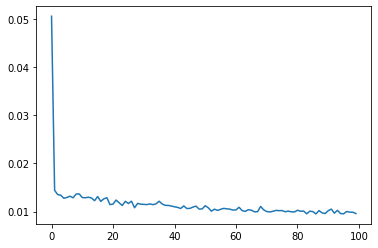

In [83]:
plt.plot([i for i in range(len(h.history['mae']))], h.history['mae'])

In [110]:
def neural_foo(args, x0, v0):
    x = x0
    v = v0
    for u in args:
        p = ann.predict(np.array([[x, v, u]]))
        x = p[0][0]
        v = p[0][1]
    return (x, v)

def neural_foo_wrap(args, x0, v0):
    return neural_foo(args, x0, v0)[0]

def neural_equation(args):
    state = neural_foo(args, 0, 0)
    return (state[0] - 0.05)**2 + state[1]**2 

In [95]:
%%time
#neural_foo([-1, -1, 0.9, 0.9, 0.2], 0, 0)
neural_foo([0, 0, 0], 0, 0)

CPU times: user 99.4 ms, sys: 0 ns, total: 99.4 ms
Wall time: 99.3 ms


(-0.018012214, 0.00621977)

 The best solution found:                                                                           
 [-0.1114059  -0.06149509 -0.02900634 -0.02736143 -0.05203889 -0.04321463
 -0.26781349 -0.44445186 -0.0294717  -0.00789478]

 Objective function:
 0.0731968962284417


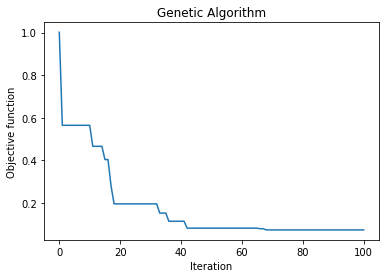

In [112]:
import scipy.optimize as opt
from geneticalgorithm import geneticalgorithm as ga
bound = np.array([[-1, 0]])
bound = np.concatenate([bound]*10)
options = {'max_num_iteration': 100, 'population_size': 10, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}
#opt.minimize(neural_equation, [0, 0, 0, 0, 0, 0, 0, 0, 0], method="BFGS")
model=ga(function=neural_equation, dimension=10, variable_type='real',variable_boundaries=bound, algorithm_parameters=options)
model.run()

In [100]:
bound

array([[-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1],
       [-1,  1]])

In [106]:
neural_equation([-0.74333636, -0.55027211, -0.93201444, -0.94395618, -0.93700951, -0.51426978, -0.84049179, -0.9658432,  -0.55773372,  0.49116179])
#neural_foo_wrap([0.01602305, 0.03741903, 0.01611771], 0, 0)

0.00020651952312974238

In [122]:
neural_foo([0, 0, 0], 0, 0)

(-0.018012214, 0.00621977)

In [76]:
opt.basinhopping?